In [1]:
import mlgrad.mlocation_scatter as mls
import mlgrad.avragg as avragg
import mlgrad.distance as distance
import mlgrad.func as func

from mlgrad import erm_fg, erm_sg, erm_irgd, fg, fg_rud, sg, weights, averager_it, erisk

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.style.use(['seaborn-paper', 'seaborn-white', 'seaborn-ticks'])

In [2]:
X0 = np.random.rand(200)
Y0 = np.random.rand(200)
Z0 = np.random.rand(200)
X = []
k = 0
for x0, y0, z0 in zip(X0,Y0,Z0):
    x0 = 2*x0 - 1
    x, y = x0*np.cos(2*np.pi*y0), x0*np.sin(2*np.pi*y0)
    s = 1
    if k % 2:
        s = -1
    z = z0*s*np.sqrt(1.-x*x-y*y)
    x *= 2
    y *= 6
    X.append((x,y,z))
    k += 1
X = np.array(X)

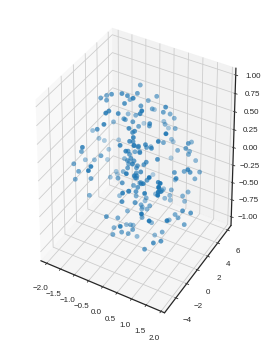

In [3]:
plt.figure(figsize=(10.0, 6.0))
fig = plt.gcf()
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf1 = ax1.scatter3D(X[:,0], X[:,1], X[:,2], )
plt.minorticks_on()
plt.grid(1)
plt.show()

In [4]:
XY = np.c_[X, Y]

NameError: name 'Y' is not defined

In [ ]:
avg = avragg.MWAverage(averager_it(func.QuantileFunc(0.8, func.Sqrt(0.001))))
mlse = mls.MLocationScatterEstimator(avg, n_iter=5000)
mlse.fit(XY)

In [ ]:
loc, sc = mlse.loc, mlse.S
distfunc = mlse.distfunc

In [ ]:
print(loc.base)
print(mlse.S.base)
print(mlse.K)


In [ ]:
loc0 = sum([xy for xy in XY])/len(XY)

In [ ]:
plt.figure(figsize=(5.0, 4.0))
plt.scatter(X, Y, s=49, c='w', edgecolors='k', linewidth=1.)
plt.scatter([loc[0]], [loc[1]], s=49, c='k', edgecolors='k', linewidth=1., marker='o')
plt.scatter([loc0[0]], [loc0[1]], s=49, c='k', edgecolors='k', linewidth=1., marker='s')
plt.minorticks_on()
plt.grid(1)
plt.show()

In [ ]:
print(np.linalg.eigvals(mlse.S))
print(np.linalg.eigvals(mlse.S0))

In [ ]:
distfunc = distance.MahalanobisDistance(np.linalg.inv(mlse.S))
distfunc0 = distance.MahalanobisDistance(np.linalg.inv(mlse.S0))

In [ ]:
D0 = [distfunc0(xy, mlse.loc0) for xy in XY]
D = [distfunc(xy, mlse.loc) for xy in XY]
plt.scatter(D0, D, c='w', edgecolor='k', linewidth=1)
plt.xlabel('classic distance')
plt.ylabel('robust distance')
plt.show()